# FordGoBike Trip Data
## by Yalçın FİLİZ 

## Investigation Overview

> In this research, my aim is to make visible the usage habits, popular time periods and general user behaviors of different user groups, different age groups, people of different genders by using the accumulated data of the Ford GoBike system.

## Dataset Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. For further info https://en.wikipedia.org/wiki/Bay_Wheels


> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. 
> Data set contains variables & data about 180000 bike riding record. These records include data for February 2019. There are 21 different types of variables for each ride related with ride duration, time, gender, age, date,stations & users etc.. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('fordgobike_clean.csv')
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,user_age,duration_minute,riding_month,riding_day,riding_hour
159904,862,2019-02-04 17:01:54.095,2019-02-04 17:16:16.570,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,86.0,Market St at Dolores St,37.769305,...,5280,Subscriber,1983,Female,No,36,14,February,Monday,17
2556,434,2019-02-28 17:55:12.258,2019-02-28 18:02:27.118,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,6567,Subscriber,1972,Male,No,47,7,February,Thursday,17
112299,363,2019-02-11 20:46:52.320,2019-02-11 20:52:55.828,386.0,24th St at Bartlett St,37.752105,-122.419724,142.0,Guerrero Park,37.745739,...,6224,Subscriber,1978,Male,No,41,6,February,Monday,20
43229,2534,2019-02-22 12:13:35.345,2019-02-22 12:55:49.521,241.0,Ashby BART Station,37.852477,-122.270213,270.0,Ninth St at Heinz Ave,37.853489,...,6454,Subscriber,1981,Male,Yes,38,42,February,Friday,12
107004,214,2019-02-12 16:09:00.879,2019-02-12 16:12:35.255,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,2123,Subscriber,1971,Female,No,48,3,February,Tuesday,16
54881,258,2019-02-21 08:23:48.853,2019-02-21 08:28:07.002,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,343.0,Bryant St at 2nd St,37.783172,...,6114,Subscriber,1985,Male,No,34,4,February,Thursday,8
135161,1367,2019-02-07 17:31:47.283,2019-02-07 17:54:35.225,321.0,5th St at Folsom,37.780146,-122.403071,355.0,23rd St at Tennessee St,37.755367,...,2030,Subscriber,1992,Female,No,27,22,February,Thursday,17
169561,3786,2019-02-01 18:24:30.062,2019-02-01 19:27:36.893,254.0,Vine St at Shattuck Ave,37.880222,-122.269592,256.0,Hearst Ave at Euclid Ave,37.875112,...,5131,Subscriber,1997,Male,No,22,63,February,Friday,18
102888,187,2019-02-13 13:21:25.206,2019-02-13 13:24:32.263,253.0,Haste St at College Ave,37.866418,-122.253799,239.0,Bancroft Way at Telegraph Ave,37.868813,...,1512,Subscriber,1995,Male,Yes,24,3,February,Wednesday,13
55723,249,2019-02-21 07:12:46.290,2019-02-21 07:16:56.156,223.0,16th St Mission BART Station 2,37.764765,-122.420091,100.0,Bryant St at 15th St,37.767100,...,6335,Subscriber,1987,Male,No,32,4,February,Thursday,7


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike Usage by Days

> Thursday & Tuesday are the most popular days. Monday,wednesday and friday counts are very close. But weekend days are obvioulsy lower than working days.We can say that the system is used more intensely during working days. We can work on different campaigns to increase usage on the weekend.

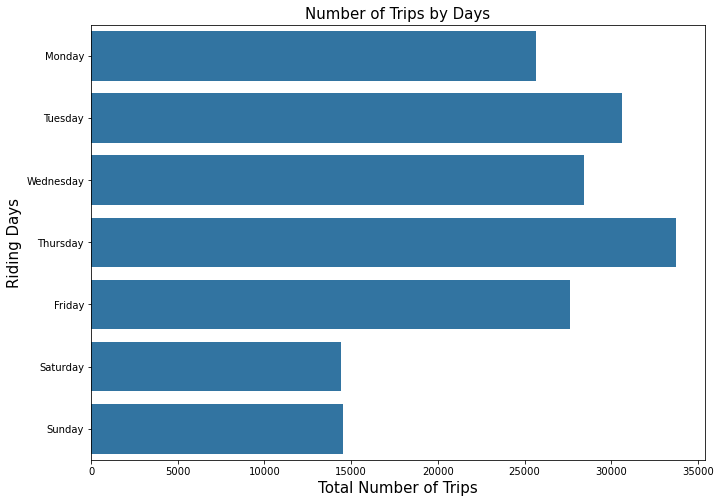

In [27]:
plt.figure(figsize=[ 11, 8]);

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
color_base = sb.color_palette()[0]
sb.countplot(data=df_clean,y='riding_day',color=color_base , order=days)
plt.ylabel('Riding Days',fontsize = 15)
plt.xlabel('Total Number of Trips',fontsize=15)
plt.title('Number of Trips by Days',loc='center',fontsize=15)

plt.show()

## Ford GoBike Usage by Hours

> Usage distrubution by hours is similar to a conventional workday traffic density data. It is clearly seen that there are peak hours in the system at the start (08-09) and the end (17-18) hours. The insight behind graph that bikes are mostly being used by commuters.

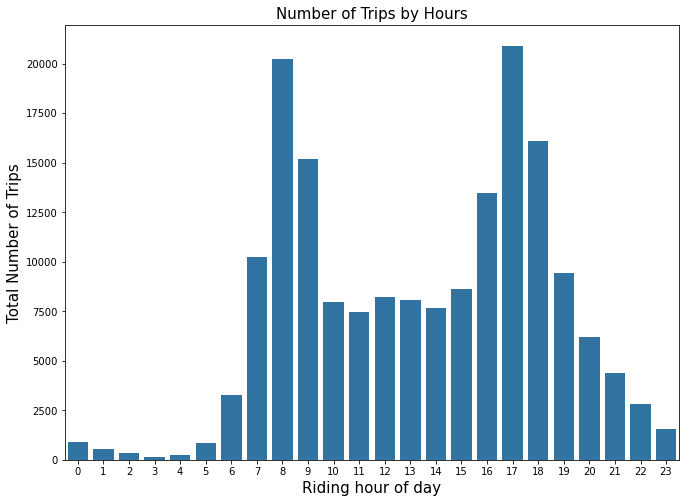

In [32]:
plt.figure(figsize=[ 11, 8]);

sb.countplot(data=df_clean,x=df_clean.riding_hour,color=color_base)
plt.xlabel('Riding hour of day',fontsize=15)
plt.ylabel('Total Number of Trips',fontsize=15)
plt.title('Number of Trips by Hours',fontsize=15)
plt.show()

## Ford GoBike Trip Durations

99% of the trips have times under 55 minutes. In addition, the vast majority of them have times under 10 minutes. It corresponds to an average usage of 11 minutes.



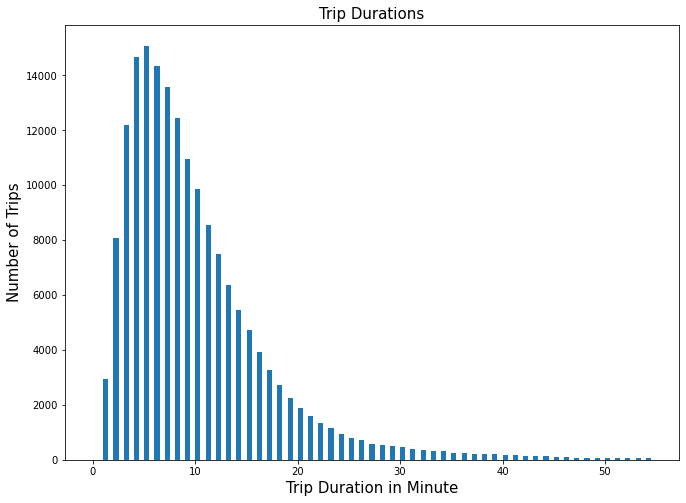

In [48]:
plt.figure(figsize=[ 11, 8]);

bin_edges = np.arange(0, 55,0.5)
plt.hist(data=df_clean, x='duration_minute', bins=bin_edges,color=color_base)

plt.xlabel('Trip Duration in Minute',fontsize=15)
plt.ylabel('Number of Trips',fontsize=15)
plt.title('Trip Durations',fontsize=15)
plt.show()

## Ford GoBike Usage By Gender

75% of total use is done by male. 

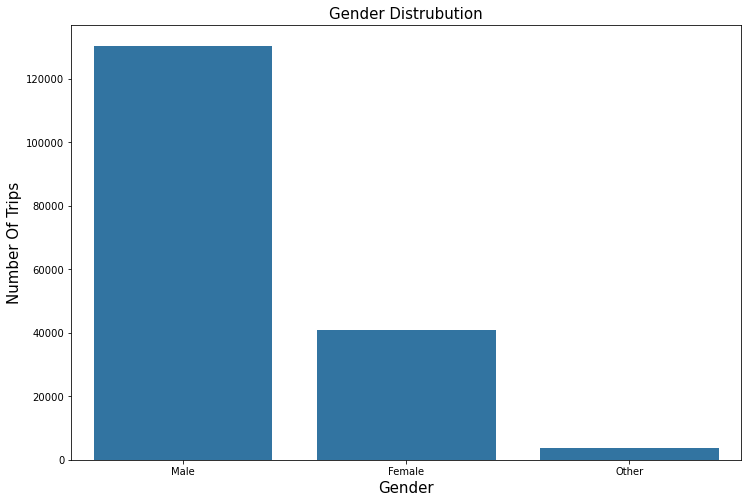

In [81]:
plt.figure(figsize=[ 12, 8]);
order_type = df_clean.member_gender.value_counts().index

sb.countplot(data=df_clean, x='member_gender', color=color_base,order=order_type);
plt.xlabel('Gender',fontsize=15);
plt.ylabel('Number Of Trips',fontsize=15);
plt.title('Gender Distrubution',fontsize=15);


## Forf GoBike Usage by Age

The average age is 34. The vast majority of users fall in the 25-35 age bracket. We can say that the age range in which the working population is predominant. In fact, we can say that the usage rate peak during working hours confirms this data.

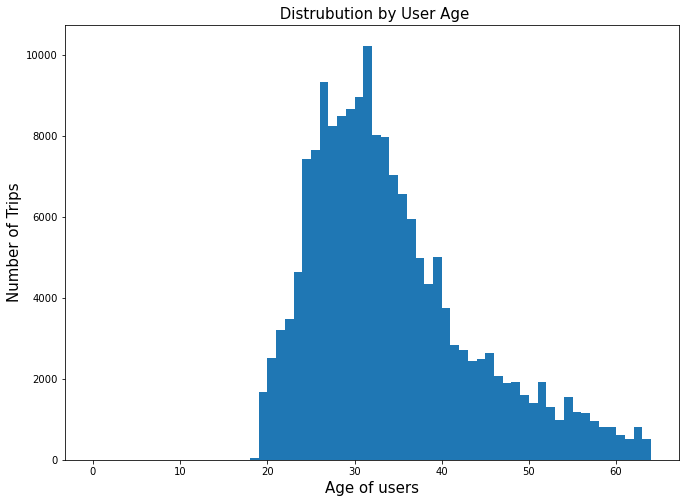

In [74]:
plt.figure(figsize=[11, 8]);

bin_edges = np.arange(0,65,1)
plt.hist(data=df_clean,x='user_age',bins = bin_edges,color=color_base)
plt.title(" Distrubution by User Age",fontsize=15)
plt.xlabel('Age of users',fontsize=15)
plt.ylabel('Number of Trips',fontsize=15);

## Ford GoBike User Type 

Vast majority of trips are made by subscribers.

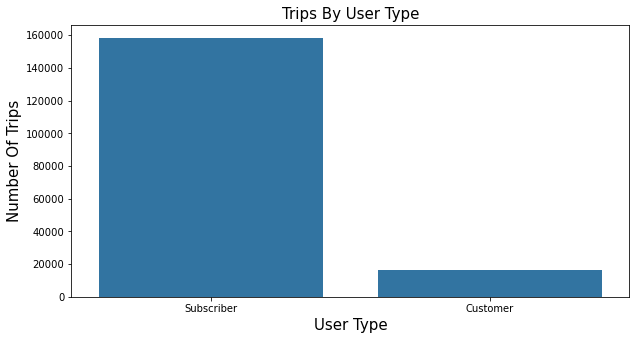

In [95]:
plt.figure(figsize=[10,5]);
order_type = df_clean.user_type.value_counts().index
sb.countplot(data=df_clean,x=df_clean.user_type,color=color_base,order=order_type);
plt.xlabel('User Type',fontsize=15)
plt.ylabel('Number Of Trips',fontsize=15)
plt.title('Trips By User Type',fontsize=15);

## Daily Total Usage - Customer VS Subscriber 

As we can see from the graph, customers have lower usage numbers in terms of volume. But when we look at the daily changes, customers provide a more stable and constant usage from day to day. Subscribers, on the other hand, show heavy use on weekdays, while the intensity of use at weekends drops drastically.

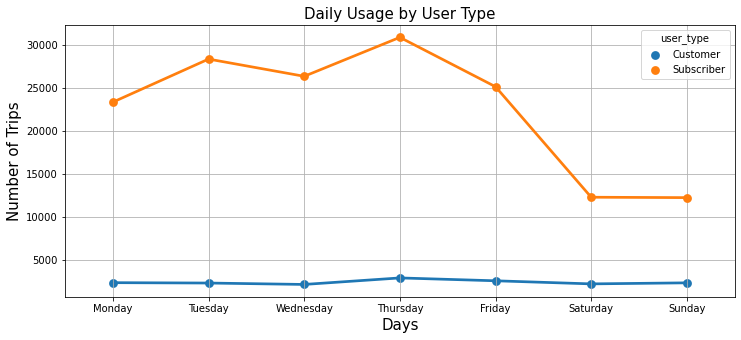

In [100]:
plt.figure(figsize=(12, 5))

df_clean_user_daily = df_clean.groupby(['riding_day', 'user_type']).size().reset_index()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

sb.pointplot(data=df_clean_user_daily,x='riding_day',y=0,hue='user_type',order=weekday);

plt.title('Daily Usage by User Type',fontsize = 15)
plt.xlabel('Days',fontsize=15)
plt.ylabel('Number of Trips',fontsize=15);
plt.grid()


## User Age by Days 

Those who use weekdays are slightly older. This is another graphic that confirms that the working population on weekdays use it more intensively.

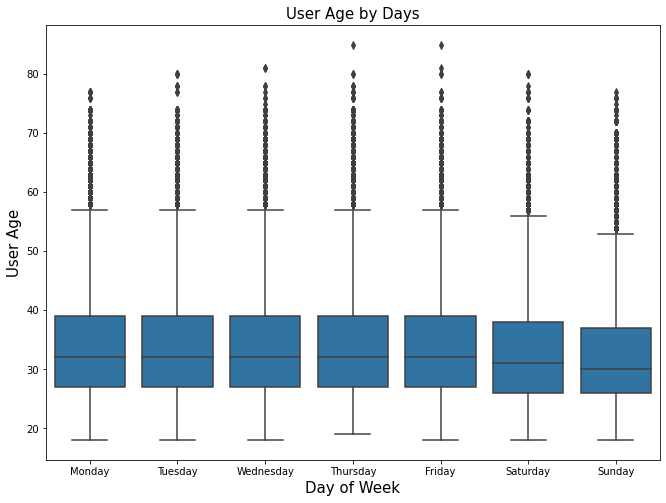

In [105]:
plt.figure(figsize=[11, 8]);
sb.boxplot(data=df_clean, x='riding_day', y='user_age', color=color_base,order=weekday);
plt.xlabel('Day of Week',fontsize=15);
plt.ylabel('User Age',fontsize=15);
plt.title('User Age by Days',fontsize=15);


## Daily Average Trip Duration by User Type 

Although the number of weekend uses is decreasing, the average usage time per trip is increasing. 
The average usage time is increasing for all users over the weekend, but the rate of increase in customers is higher than others. The increase in subscribers is at a minimal level. Customers use the average minimum on Wednesday.

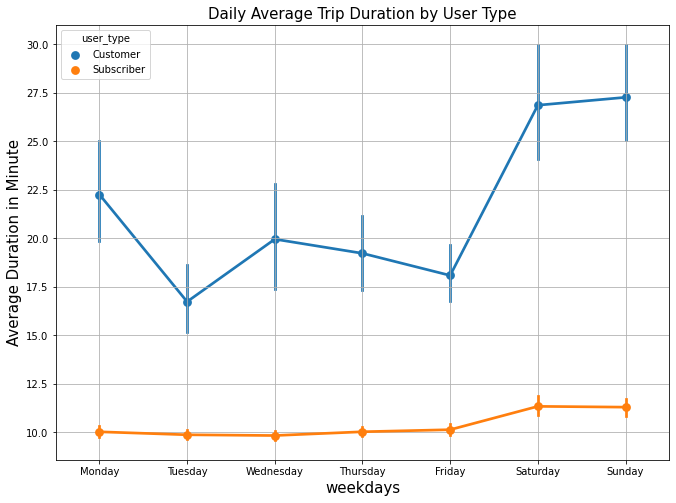

In [118]:
plt.figure(figsize=[11, 8]);

sb.pointplot(data=df_clean, x='riding_day', y='duration_minute', hue='user_type',order=weekday);
plt.xlabel('weekdays',fontsize=15);
plt.ylabel('Average Duration in Minute',fontsize=15)
plt.title('Daily Average Trip Duration by User Type',Fontsize=15);
plt.grid()

## Hourly Usage for Customers and Subscribers

It can be said that there is a density of around 8 and 17 on weekdays for two of the customers and subscribers. However, this is experienced at a higher intensity in subscribers. Customers have a relatively homogeneous distribution. On the weekend, it seems clear that customers prefer the afternoon time zone. But it shows a more homogeneous distribution compared to weekdays.

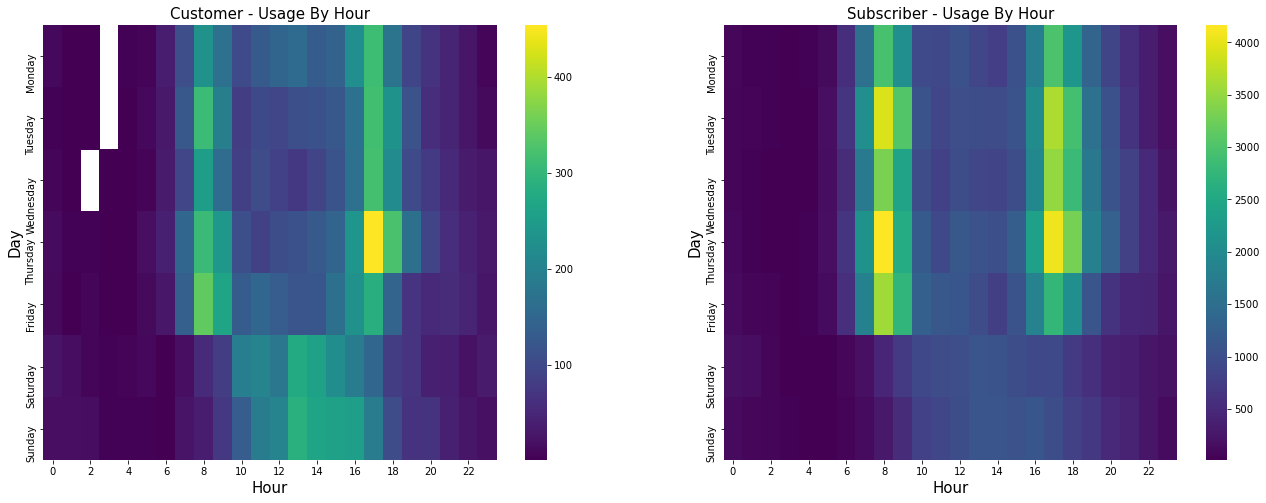

In [127]:
plt.figure(figsize=[11, 8]);

plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"')
customer_counts = df_customer.groupby(['riding_day', 'riding_hour']).size()
customer_counts = customer_counts.reset_index(name='count')
customer_counts = customer_counts.pivot(index='riding_day', columns='riding_hour', values='count')
customer_counts = customer_counts.reindex(weekday)
sb.heatmap(customer_counts, cmap='viridis');
plt.title('Customer - Usage By Hour', loc='center',fontsize=15);
plt.xlabel('Hour',fontsize=15);
plt.ylabel('Day',fontsize=15);

plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"')
subs_counts = df_subscriber.groupby(['riding_day', 'riding_hour']).size()
subs_counts = subs_counts.reset_index(name='count')
subs_counts = subs_counts.pivot(index='riding_day', columns='riding_hour', values='count')
subs_counts = subs_counts.reindex(weekday)
sb.heatmap(subs_counts, cmap='viridis');
plt.title('Subscriber - Usage By Hour', loc='center',fontsize=15);
plt.xlabel('Hour',fontsize=15);
plt.ylabel('Day',fontsize=15);
plt.subplots_adjust(right=1.7)

## Conclusion

In this study, we examined the habits and features of the users who use the system. Clearly different usage habits and needs are observed between the two types of users. While those who use the subscription system mostly use it for commuting around 8 am and 5 pm on workdays, customers prefer it for entertainment/travel on weekends and afternoons. Subscribers take much shorter/faster journeys compared to customers. In addition, we have clearly determined that most of the use is made by the male.


In [ ]:
!jupyter nbconvert slide_deck_fordgobike.ipynb --to slides --post serve --no-input --no-prompt